<a href="https://colab.research.google.com/github/tri-mgt/Sleep_Disorder_Analysis-EDA/blob/main/EDA_Sleep_Disorder_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective:**
---

The main goal is to investigate the factors contributing to sleep disorder, including occupation, age, gender, sleep duration, and daily steps.


### **Hypothesis:**
* Healthcare workers are likely to experience sleep disorder compared to non-healthcare workers. Thus, they have low quality of sleep, short sleep durations, and a higher prevalence of sleep disorder.


### **Analysis breakdown:**

**Occupation vs. Sleep Disorder**

1. Which profession suffer the most from sleep disorder?
2. How much sleep does each professional get?
3. What is their stress level?

**Gender vs. Sleep Disorder**
1. Gender Count
2. Which gender experiences sleep disorder the most frequently?

**Age vs. Sleep Disorder**
1. What is the average age at which people experience sleep disorder?

**Correlation Matrix**
1. postive and negative correlation variable
2. Visualize it

**Daily Steps vs. Sleep Disorder**

Broken down into 2 groups:

* **Group 1:** Individuals who walked 7,000 and more
* **Group 2:** Individuals who walked less than 7,000 steps

  1. What is the quality of sleep and the sleep duration for each group?
  2. How many individuals have a sleep disorder?
  3. BMI Category




#### **Data Features**


---


**Person ID:** An identifier for each individual.

**Gender:** The gender of the person (Male/Female).

**Age:** The age of the person in years.

**Occupation:** The occupation or profession of the person.

**Sleep Duration (hours):** The number of hours the person sleeps per day.

**Quality of Sleep (scale: 1-10):** A subjective rating of the quality of sleep, ranging from 1 to 10.

**Physical Activity Level (minutes/day):** The number of minutes the person engages in physical activity daily.

**Stress Level (scale: 1-10):** A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

**BMI Category:** The BMI category of the person (e.g., Underweight, Normal, Overweight).

**Blood Pressure (systolic/diastolic):** The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

**Heart Rate (bpm):** The resting heart rate of the person in beats per minute.

**Daily Steps:** The number of steps the person takes per day.

**Sleep Disorder:** The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea)

Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [166]:
plt.style.use('fast')

Load dataset

In [4]:
# Load the sleep lifetyle dataset
sleep_disorder = pd.read_csv('sleep_lifestyle.csv')

In [5]:
print('Dimensions:', sleep_disorder.shape)

Dimensions: (374, 13)


Understanding the dataset

In [ ]:
# View the first 5 rows of dataset
sleep_disorder.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# count missing value in column
sleep_disorder.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [ ]:
# Descriptive statistics
sleep_disorder.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


For this analysis, we don't need Person ID, so we'll drop it


In [6]:
# Dropping 'Person ID' Column
sleep_disorder.drop('Person ID',axis=1, inplace=True)

In [ ]:
sleep_disorder.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [209]:
# How many have a sleep disorder in general
general_sleep_disorder = sleep_disorder.groupby('Sleep Disorder').size().sort_values()
general_sleep_disorder

Sleep Disorder
Insomnia        77
Sleep Apnea     78
None           219
dtype: int64

# **Profession vs. Sleep Disorder**



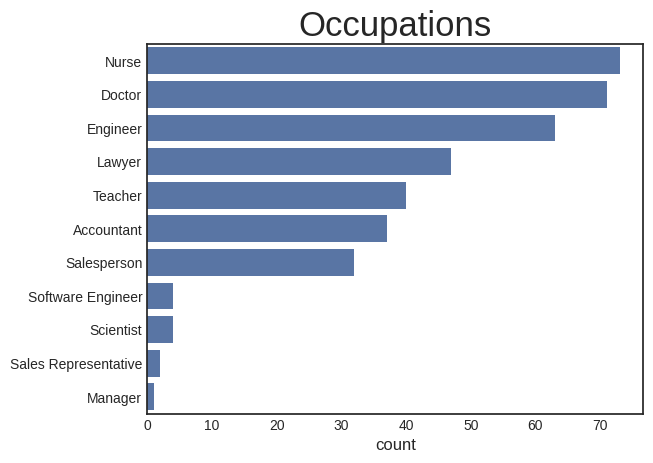

In [184]:
# Plotting Occupation
sns.countplot(y='Occupation', data=sleep_disorder, order=sleep_disorder['Occupation'].value_counts().index)

plt.title('Occupations', fontsize=25)
plt.ylabel(None);

### **Which profession suffers the most from sleep disorder?**

In [8]:
# How many of these professional worker have sleep disorder

# Occupation with no disorder
no_disorder_occupation = sleep_disorder[sleep_disorder['Sleep Disorder'] == 'None'].groupby('Occupation').size().sort_values(ascending=False)

# Occupation wtih Insomnia
insomnia_occupation = sleep_disorder[sleep_disorder['Sleep Disorder'] == 'Insomnia'].groupby('Occupation').size().sort_values(ascending=False)

# Occupation with Sleep Apnea
sleepApnea_occupation = sleep_disorder[sleep_disorder['Sleep Disorder'] == 'Sleep Apnea'].groupby('Occupation').size().sort_values(ascending=False)

print('Insomnia', insomnia_occupation)
print('--')
print('Sleep Apnea', sleepApnea_occupation)

Insomnia Occupation
Salesperson          29
Teacher              27
Accountant            7
Engineer              5
Doctor                3
Nurse                 3
Lawyer                2
Software Engineer     1
dtype: int64
--
Sleep Apnea Occupation
Nurse                   61
Doctor                   4
Teacher                  4
Lawyer                   3
Sales Representative     2
Scientist                2
Engineer                 1
Salesperson              1
dtype: int64


In [9]:
# Profession with no sleep disorder
print(no_disorder_occupation)

Occupation
Doctor               64
Engineer             57
Lawyer               42
Accountant           30
Nurse                 9
Teacher               9
Software Engineer     3
Salesperson           2
Scientist             2
Manager               1
dtype: int64


* The most affected occupations by insomnia were **sales** (**n=29**) and **teaching** (**n=27**), while lawyers an software engineers experienced the least impact.

* In regards to sleep apnea disorder, **Nurses** were the most affected, with a total of **61** individuals.




In [185]:
# Nurses with Sleep Disorder: Insomnia and Sleep Apnea
nurses_with_sleep_disorder = insomnia_occupation['Nurse'] + sleepApnea_occupation['Nurse']
print('Nurses with Sleep Disorder:', nurses_with_sleep_disorder)

# Doctors with Sleep Disorder: Insomnia and Sleep Apnea
doctors_with_sleep_disorder = insomnia_occupation['Doctor'] + sleepApnea_occupation['Doctor']
print('Doctors with Sleep Disorder:', doctors_with_sleep_disorder)

print('Total Healthcare workers:', nurses_with_sleep_disorder + doctors_with_sleep_disorder)

Nurses with Sleep Disorder: 64
Doctors with Sleep Disorder: 7
Total Healthcare workers: 71


Apparently, sleep apnea is more common in men than in women. Is it true with our dataset?

Source: [Sleep Apnea Statistics](https://www.ncoa.org/adviser/sleep/sleep-apnea-statistics/#:~:text=Sleep%20apnea%20is%20a%20disorder,people%20with%20certain%20chronic%20conditions.)


In [ ]:
# Male vs Female Sleep Apnea Count
male_disorder_sleep_apnea = ((sleep_disorder['Gender'] == 'Male') & (sleep_disorder['Sleep Disorder'] == 'Sleep Apnea')).sum()
female_disorder_sleep_apnea = ((sleep_disorder['Gender'] == 'Female') & (sleep_disorder['Sleep Disorder'] == 'Sleep Apnea')).sum()

print(male_disorder_sleep_apnea > female_disorder_sleep_apnea)

False


### **How much sleep does each professional get?**

In [11]:
# Sleep Duration is measured in hours
sleep_disorder.groupby('Occupation')['Sleep Duration'].size().sort_values(ascending=False)

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: Sleep Duration, dtype: int64

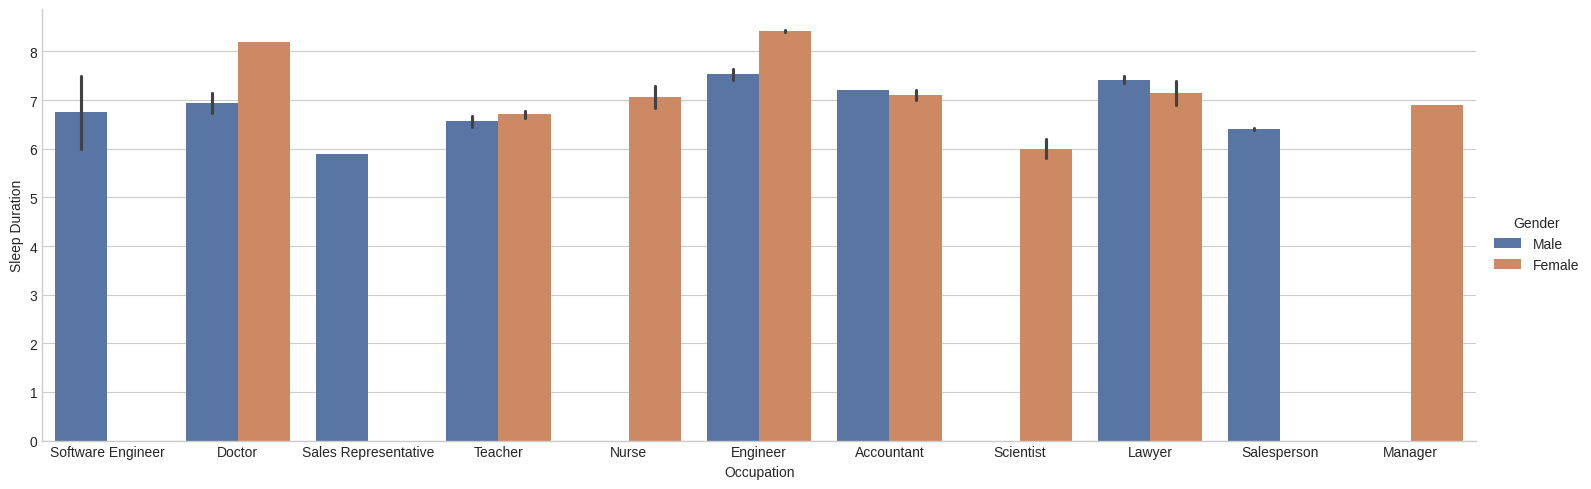

In [137]:
# Let's visualize it
sns.catplot(data=sleep_disorder, kind='bar', x='Occupation', y='Sleep Duration', hue='Gender', height=5, aspect=3);

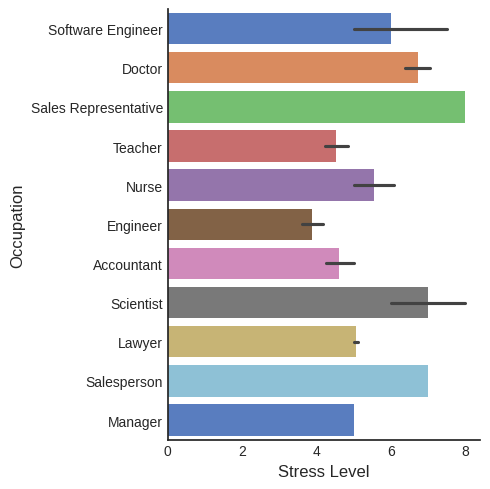

In [208]:
# Stress Level
sns.catplot(data=sleep_disorder, x='Stress Level', y='Occupation', kind='bar', palette='muted');

## **Gender vs. Sleep Disorder**

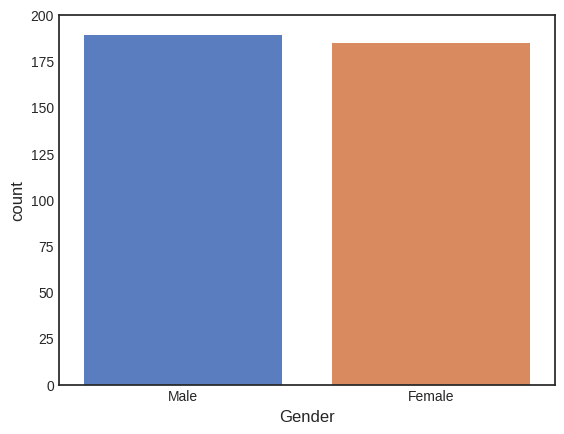

In [206]:
# Gender count
sns.countplot(data=sleep_disorder, x='Gender', palette='muted');
plt.ylim(0, 200);

### **Which gender experiences sleep disorder the most frequently?**

In [83]:
# Exclude sleep disorder == None
male_sleep_disorder = sleep_disorder[(sleep_disorder['Gender'] == 'Male') & (sleep_disorder['Sleep Disorder'].isin(['Insomnia', 'Sleep Apnea']))]
female_sleep_disorder = sleep_disorder[(sleep_disorder['Gender'] == 'Female') & (sleep_disorder['Sleep Disorder'].isin(['Insomnia', 'Sleep Apnea']))]

male_sum = len(male_sleep_disorder)
fem_sum = len(female_sleep_disorder)

print('Males with sleep disorder:', male_sum)
print('Females with sleep disorder:', fem_sum)

Males with sleep disorder 52
Females with sleep disorder 103


Hence, women experience sleep disorder more frequently than men.

In [105]:
# Break down gender count
male_count = (sleep_disorder['Gender'] == 'Male').sum()
female_count = (sleep_disorder['Gender'] == 'Female').sum()

# No Disorder
male_disorder_none = ((sleep_disorder['Gender'] == 'Male') & (sleep_disorder['Sleep Disorder'] == 'None')).sum()
female_disorder_none = ((sleep_disorder['Gender'] == 'Female') & (sleep_disorder['Sleep Disorder'] == 'None')).sum()

# Sleep Apnea
male_disorder_sleepApnea = ((sleep_disorder['Gender'] == 'Male') & (sleep_disorder['Sleep Disorder'] == 'Sleep Apnea')).sum()
female_disorder_sleepApnea = ((sleep_disorder['Gender'] == 'Female') & (sleep_disorder['Sleep Disorder'] == 'Sleep Apnea')).sum()

# Insomnia
male_disorder_Insomnia = ((sleep_disorder['Gender'] == 'Male') & (sleep_disorder['Sleep Disorder'] == 'Insomnia')).sum()
female_disorder_Insomnia = ((sleep_disorder['Gender'] == 'Female') & (sleep_disorder['Sleep Disorder'] == 'Insomnia')).sum()

print('NO DISORDER \nMale:', male_disorder_none, '\nFemale:', female_disorder_none)
print('\nSLEEP APNEA\nMale:', male_disorder_sleepApnea,'\nFemale:', female_disorder_sleepApnea)
print('\nINSOMNIA\nMale:', male_disorder_Insomnia, '\nFemale:', female_disorder_Insomnia)

print('-----------')

print('Total Male:', male_count)
print('Total Female:', female_count)

NO DISORDER 
Male: 137 
Female: 82

SLEEP APNEA
Male: 11 
Female: 67

INSOMNIA
Male: 41 
Female: 36
-----------
Total Male: 189
Total Female: 185


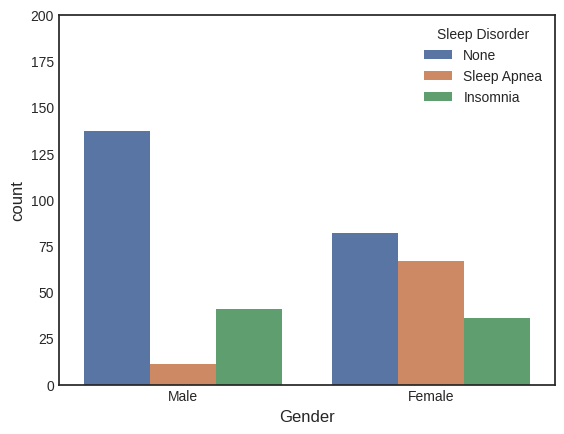

In [202]:
# Plot it
sns.countplot(x='Gender', hue='Sleep Disorder', data=sleep_disorder)
plt.ylim(0, 200);

# **Age vs. Sleep Disorder**

### **What is the average age at which people experience sleep disorder?**

In [118]:
# Get the average age for sleep disorder
age_with_insomnia = sleep_disorder[sleep_disorder['Sleep Disorder'] == 'Insomnia']
age_with_sleepapnea = sleep_disorder[sleep_disorder['Sleep Disorder'] == 'Sleep Apnea']

age_with_sleep_disorder = sleep_disorder[sleep_disorder['Sleep Disorder'].isin(['Insomnia', 'Sleep Apnea'])]

print('On average, people experience sleep disorder at the age of:', int(age_with_sleep_disorder['Age'].mean()), 'years old')
print('With Insomnia: ', int(age_with_insomnia['Age'].mean()), 'years old')
print('With Sleep Apnea:', int(age_with_sleepapnea['Age'].mean()), 'years old')


On average, people experience sleep disorder at the age of: 46 years old
With Insomnia:  43 years old
With Sleep Apnea: 49 years old


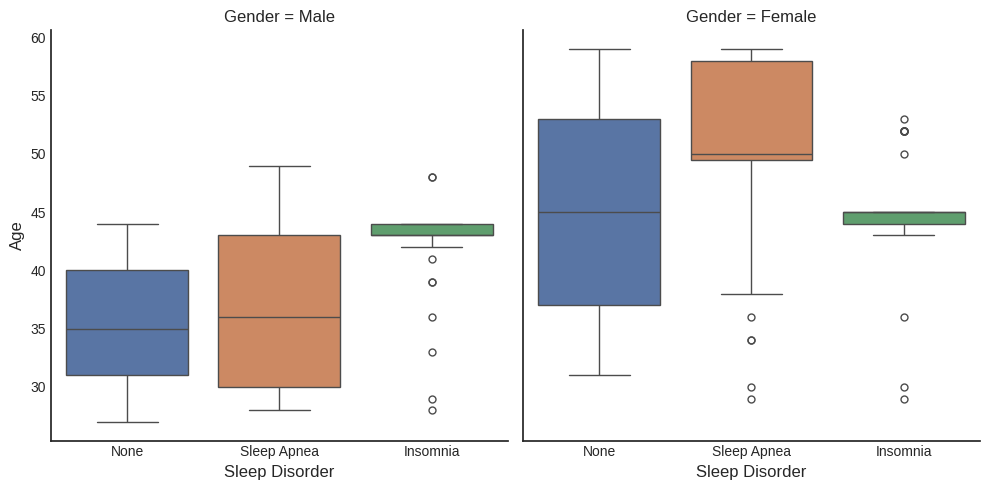

In [162]:
# Plot boxplot
sns.catplot(data=sleep_disorder, x='Sleep Disorder', y='Age', kind='box', col='Gender', palette='deep');

# **Correlation Matrix**

1. **Correlation** - The relationship between two variables
2. **Correlation Coefficent** ( ***r*** ) - represent how strong the correlation between two variable.
  * 1 = strong **positive** correlation
  *-1 = strong **negative** correlation




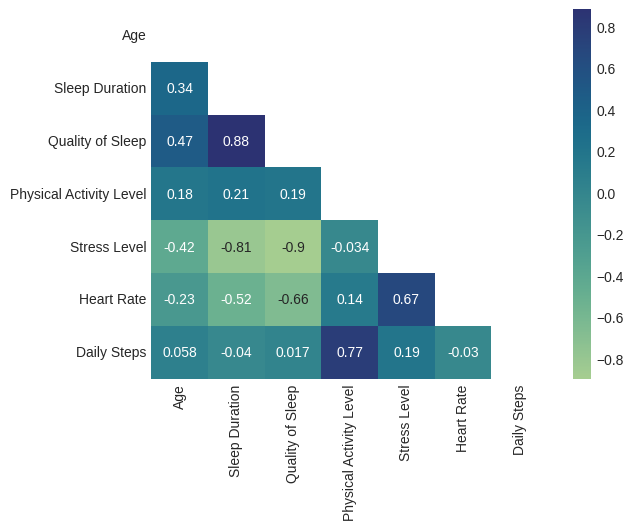

In [156]:
# Correlation matrix
correlation = sleep_disorder.corr()

# Mask
mask = np.triu(np.ones_like(correlation))

sns.heatmap(correlation, mask=mask, center=0, annot=True,  cmap='crest');


**Positive Correlation:**

1. Physical Activity Level vs Daily Steps: r = 0.77
2. Quality of Sleep vs Sleep Duration: r= 0.88

**Negative Correlation:**

1. Stress Level vs Sleep Duration: r = -0.81
2. Stress Level vs Quality of Sleep: r = -0.9


---
# **Quality of Sleep vs. Sleep Duration**




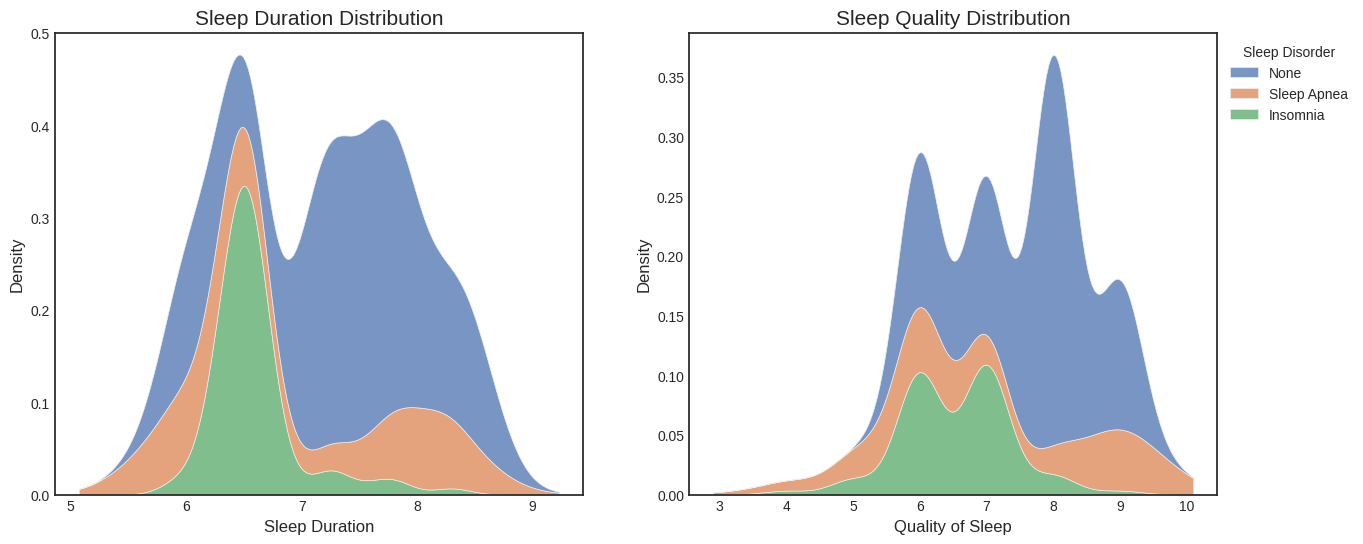

In [188]:
# Plot distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Sleep Duration
sns.kdeplot(data=sleep_disorder, x = 'Sleep Duration', ax=axes[0], hue='Sleep Disorder', fill=True, legend=False, multiple='stack', palette='deep')
axes[0].set_title('Sleep Duration Distribution', fontsize=15)

# Sleep Quality
sns.kdeplot(data=sleep_disorder, x='Quality of Sleep', ax=axes[1], hue='Sleep Disorder', fill=True, multiple='stack', palette='deep')
axes[1].set_title('Sleep Quality Distribution', fontsize=15)

# legend on the upper left
sns.move_legend(axes[1], 'upper left', bbox_to_anchor=(1,1))


# **Stress Level vs. Sleep Duration**

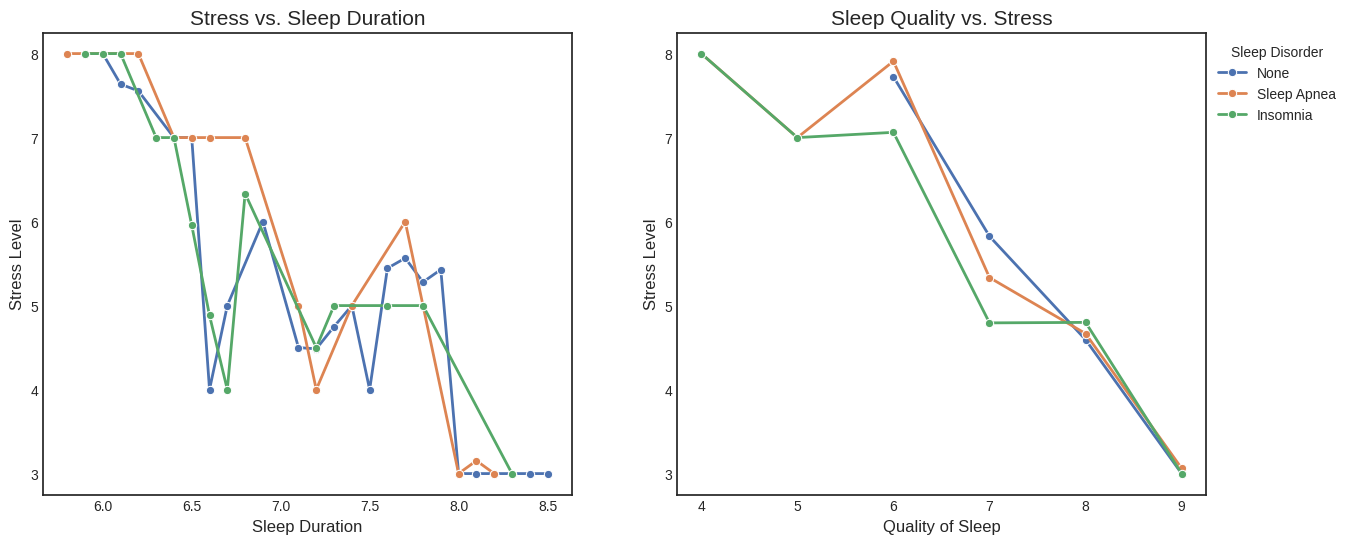

In [189]:
# Negative Correlation: Less sleep means more stress
sns.set_palette('deep')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Sleep Duration
sns.lineplot(data=sleep_disorder, x = 'Sleep Duration', y='Stress Level', ax=axes[0],
             hue='Sleep Disorder', legend=False, errorbar=None, marker='o', linewidth=2)
axes[0].set_title('Stress vs. Sleep Duration', fontsize=15)

# Sleep Quality
sns.lineplot(data=sleep_disorder, x='Quality of Sleep', y='Stress Level', ax=axes[1],
             hue='Sleep Disorder', errorbar=None, marker='o', linewidth=2)
axes[1].set_title('Sleep Quality vs. Stress', fontsize=15)

# legend on the upper left
sns.move_legend(axes[1], 'upper left', bbox_to_anchor=(1,1))


# **Daily Steps vs. Sleep Disorder**

### **Group 1:** Individuals with 7,000+ steps a day
### **Group 2:** Individuals with less than 7,000 steps a day


---


### **On average, what is the quality of sleep and the duration of sleep for each group?**




In [190]:
# filter individuals with 7K+ steps only
group_one = sleep_disorder[sleep_disorder['Daily Steps'] >= 7000]

In [192]:
# filter individuals less than 7K steps a day
group_two = sleep_disorder[sleep_disorder['Daily Steps'] < 7000]

In [194]:
# Sleep Duration and Quality of Sleep mean

print('Individuals with more steps')
print("On average, people's sleep duration is around", round(group_one['Sleep Duration'].mean(), 2), "hours per day")
print("On average, people's quality of sleep is approxiamtely", round(group_one['Quality of Sleep'].mean(), 2))

print()

print('Individuals with fewer steps')
print("On average, people's sleep duration is approximately", round(group_two['Sleep Duration'].mean(), 2), "hours per day")
print("On average, people's quality of sleep is approximatley", round(group_two['Quality of Sleep'].mean(), 2))

Individuals with more steps
On average, people's sleep duration is around 7.31 hours per day
On average, people's quality of sleep is approxiamtely 7.63

Individuals with fewer steps
On average, people's sleep duration is approximately 6.91 hours per day
On average, people's quality of sleep is approximatley 6.92


#### **Visualizing the distribution of sleep duration and quality of sleep for each sleep disorder**


---





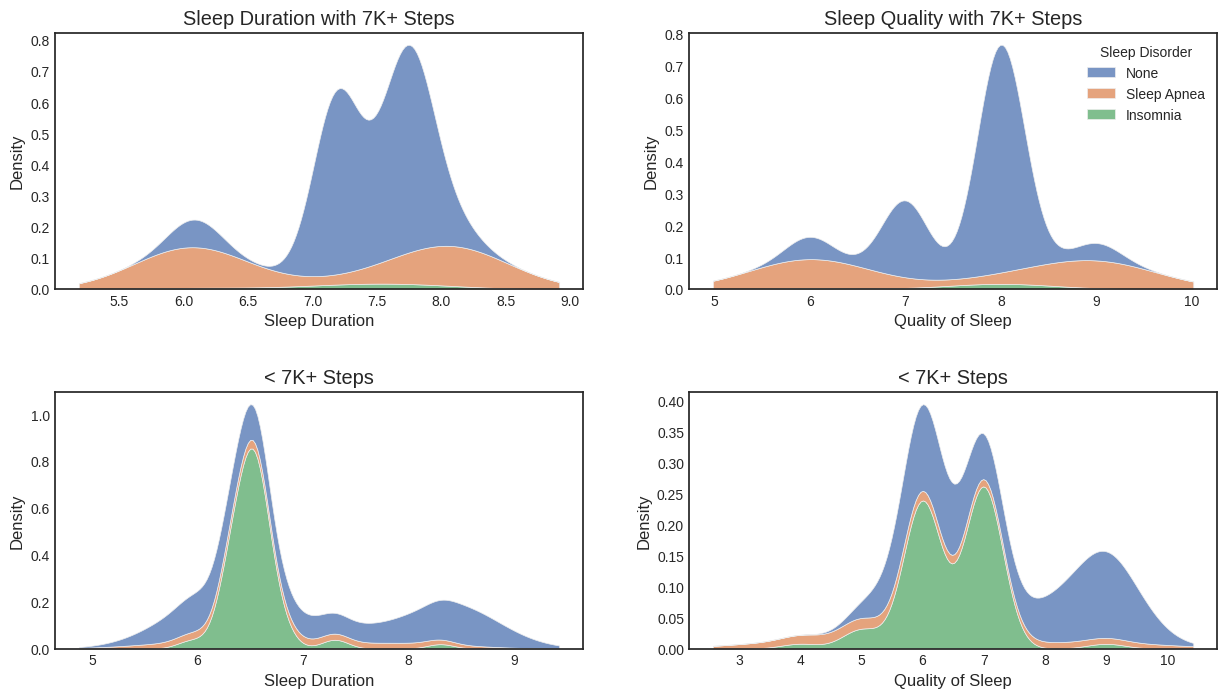

In [196]:
# Visualize: Compare Sleep Duration vs Quality of Sleep

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
plt.subplots_adjust(hspace=0.4)

# Sleep Duration & Quality of Sleep with 7K Steps
sns.kdeplot(data=group_one, x = 'Sleep Duration', ax=axes[0][0], hue='Sleep Disorder',
            fill=True, legend=False, multiple='stack')
axes[0][0].set_title('Sleep Duration with 7K+ Steps')

sns.kdeplot(data=group_one, x='Quality of Sleep', ax=axes[0][1], hue='Sleep Disorder',
            fill=True, multiple='stack')
axes[0][1].set_title('Sleep Quality with 7K+ Steps')

# Sleep Duration & Quality of Sleep with less than 7K Steps
sns.kdeplot(data=group_two, x = 'Sleep Duration', ax=axes[1][0], hue='Sleep Disorder',
            fill=True, legend=False, multiple='stack')
axes[1][0].set_title('< 7K+ Steps')

sns.kdeplot(data=group_two, x = 'Quality of Sleep', ax=axes[1][1], hue='Sleep Disorder',
            fill=True, legend=False, multiple='stack')
axes[1][1].set_title('< 7K+ Steps');

### **How many individuals have a sleep disorder?**

In [198]:
# More than 7K steps a day
group_one_disorder = group_one.groupby('Sleep Disorder').size().sort_values(ascending=False)
group_one_disorder

Sleep Disorder
None           139
Sleep Apnea     62
Insomnia         6
dtype: int64

In group 1, there are **139** people without sleep disorder, while **68** indviduals suffer from one

In [178]:
# Less than 7K steps a day
group_two_disorder = group_two.groupby('Sleep Disorder').size().sort_values(ascending=False)
group_two_disorder

Sleep Disorder
None           80
Insomnia       71
Sleep Apnea    16
dtype: int64

In Group 2, there are **80** people without sleep disorder, while **87** people suffer from sleep apnea and insomnia

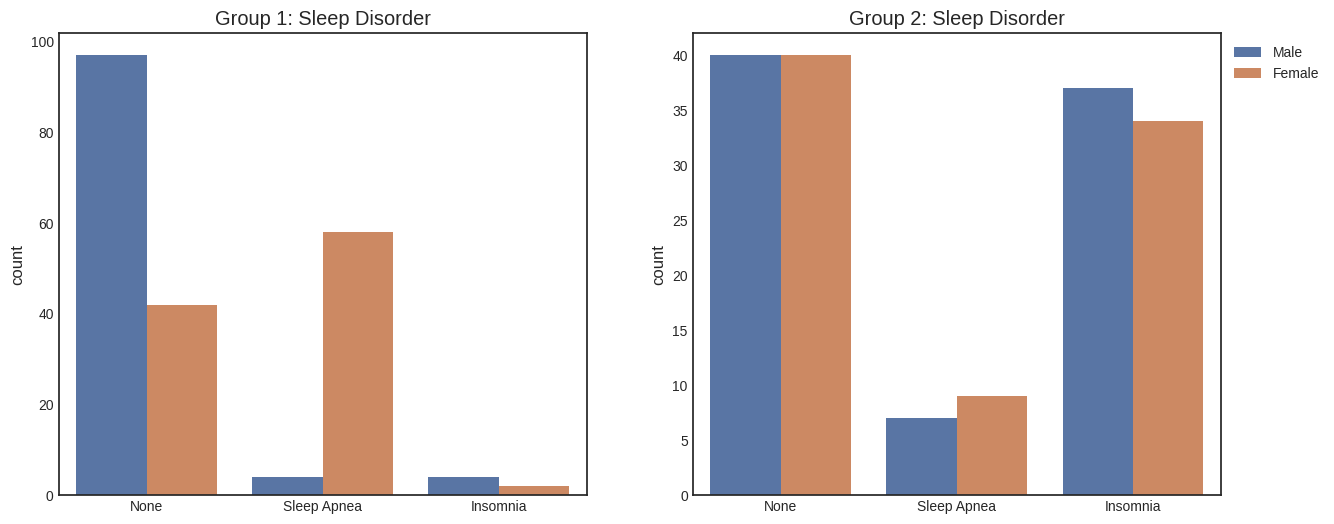

In [199]:
# Visualize it
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# group 1: 7K +
sns.countplot(data=group_one, x='Sleep Disorder',  ax=axes[0], hue='Gender',
              legend=False)
axes[0].set_title('Group 1: Sleep Disorder')
axes[0].set_xlabel('')

# group 2: < 7K+
sns.countplot(data=group_two, x='Sleep Disorder', ax=axes[1], hue='Gender')
axes[1].set_title('Group 2: Sleep Disorder')
axes[1].set_xlabel('')

# legend upper right
axes[1].legend(loc='upper left', bbox_to_anchor=(1,1));

## **Daily Steps vs BMI Category**


In [200]:
# What is BMI category of people who take 7K+ steps
group_one_bmi = group_one.groupby('BMI Category')['Sleep Disorder'].size().sort_values(ascending=False)
group_one_bmi

BMI Category
Normal           132
Overweight        63
Normal Weight     12
Name: Sleep Disorder, dtype: int64

In [181]:
group_two_bmi = group_two.groupby('BMI Category')['Sleep Disorder'].size().sort_values(ascending=False)
group_two_bmi

BMI Category
Overweight       85
Normal           63
Obese            10
Normal Weight     9
Name: Sleep Disorder, dtype: int64

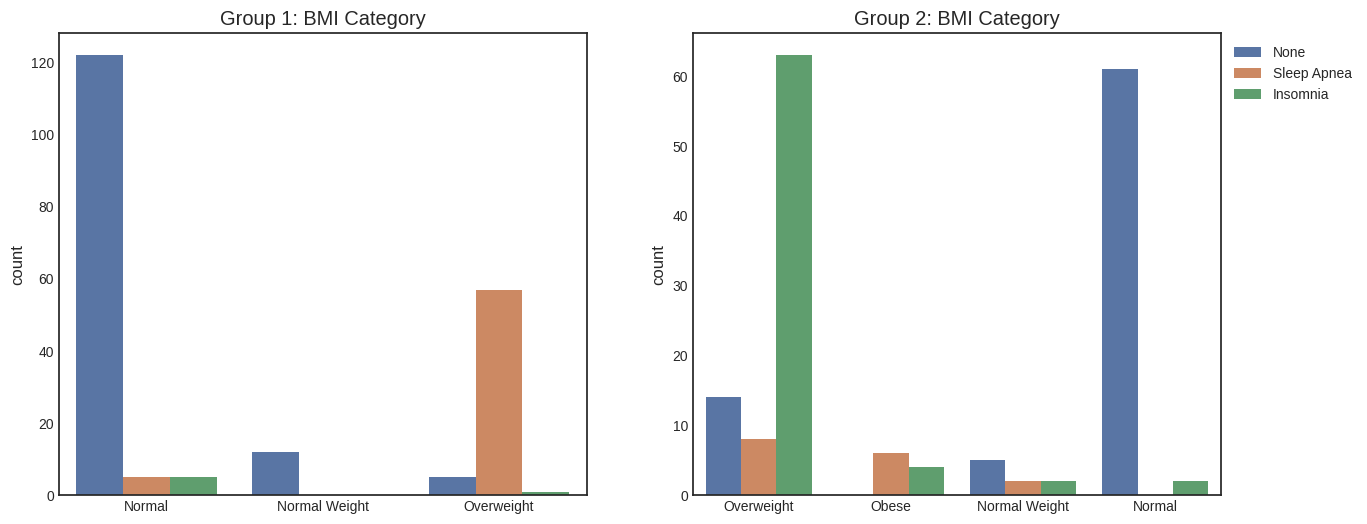

In [201]:
# Let's visualize it

# plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# group 1
sns.countplot(data=group_one, x='BMI Category',  ax=axes[0], hue='Sleep Disorder',
              legend=False)
axes[0].set_title('Group 1: BMI Category')
axes[0].set_xlabel('')

# group 2
sns.countplot(data=group_two, x='BMI Category', ax=axes[1], hue='Sleep Disorder')
axes[1].set_title('Group 2: BMI Category')
axes[1].set_xlabel('')

# legend upper right
axes[1].legend(loc='upper left', bbox_to_anchor=(1,1));

# **Conclusion**


In conclusion, nurses were the most affected by sleep apnea, while salespeople and teachers frequently experience insomnia. Additionally, sleep disorders were more common among women (n=103) compared to men (n=52), with the average age at which sleep disorder typically begins is at 46 years old.

We also observed a negative correlation between stress level and both sleep duration and quality, indicating that the higher the stress levels associated with poorer sleep quality and duration. Conversely, higher sleep quality was linked to longer sleep duration.

In terms of daily steps, we divided the data into two groups: those who walked more than 7,000 steps per day and those who walked less. Group 1 demonstrated better sleep quality compared to Group 2. Moreover, the majority of individuals in Group 2 suffered from sleep disorders, with only a few reporting none. Additionally, we observed a correlation between BMI levels and sleep disorders, with a majority of individuals suffering from sleep disorders categorized as overweight.

 Ultimately, to prevent sleep disorders, regular exercise routines such as walking can significantly benefit individuals' sleep quality and overall health.



Dataset:
* Sleep Health and Lifestyle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

Reference:

* The Effect of Physical Activity on Sleep Quality and Sleep Disorder: A Systematic Review https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10503965/

* Walk to a Better Night of Sleep: Testing the relationship between physical activity and sleep https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6801055/
